<a href="https://colab.research.google.com/github/Chandradithya8/Machine-Learning/blob/master/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/mobile_dataset.csv.txt")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
### Univariate selection
x=df.iloc[:,:-1]
y=df['price_range']

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
df.shape

(2000, 21)

In [53]:
## apply SelectKBest algorithm
a=SelectKBest(score_func=chi2,k=20)
a

SelectKBest(k=20, score_func=<function chi2 at 0x7fdc66ad96a8>)

In [6]:
a.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [7]:
df_score=pd.DataFrame(a.scores_,columns=['Score'])
df_score

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [8]:
df_features=pd.DataFrame(x.columns)
df_features

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [9]:
concat=pd.concat([df_features,df_score],axis=1)
concat.columns=['Features','Score']
concat ## the larger the score the larger is the feature importance

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [10]:
concat.nlargest(10,'Score')  ## these are the features required

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [11]:
### Feature importance - this technique gives us a score for each feature of our data. higher the score more importance it is.

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [15]:
model.feature_importances_

array([0.05994207, 0.01944143, 0.03380081, 0.01964709, 0.0317173 ,
       0.01754057, 0.03520348, 0.03380291, 0.03599244, 0.03346059,
       0.03333841, 0.04600091, 0.04881281, 0.39350832, 0.03534967,
       0.03458953, 0.03487111, 0.01367858, 0.01863297, 0.02066897])

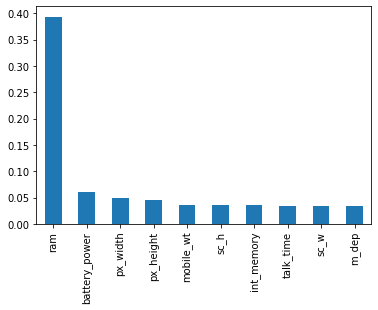

In [23]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='bar')

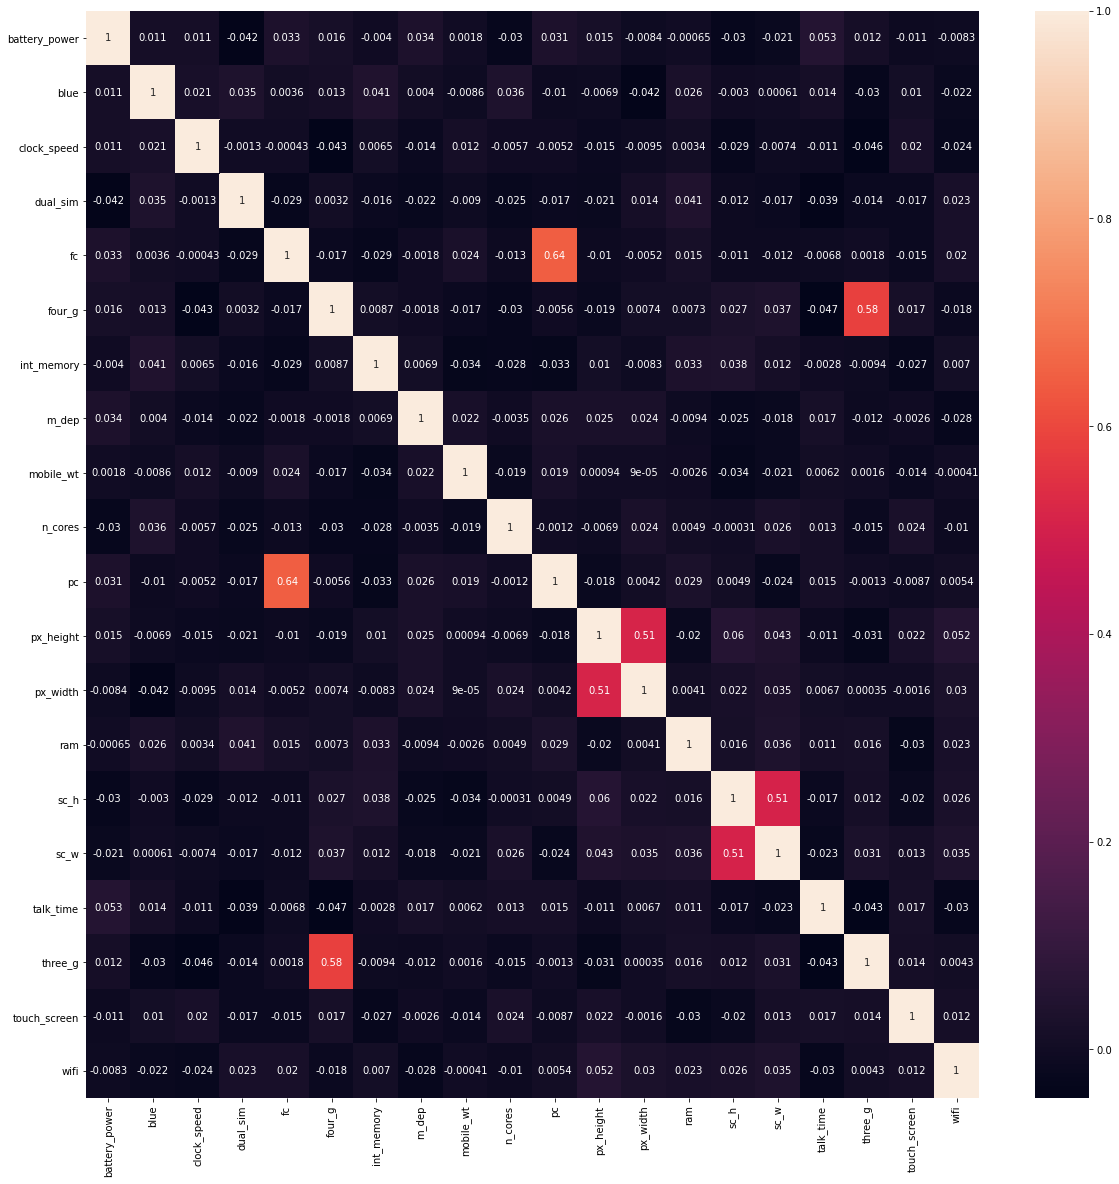

In [45]:
## Correlation
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)

In [36]:
threshold=0.5

In [37]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
correlation(df.iloc[:,:-1],threshold) # these features are highly correlated with respect to threshold=0.5. so these can be removed

{'pc', 'px_width', 'sc_w', 'three_g'}

In [46]:
 ### Information Gain

In [54]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_info

array([0.03275589, 0.        , 0.0124118 , 0.        , 0.024514  ,
       0.0042178 , 0.        , 0.01997136, 0.00485937, 0.        ,
       0.        , 0.0252889 , 0.02565571, 0.84590535, 0.        ,
       0.0152535 , 0.00830742, 0.01296815, 0.02241855, 0.        ])

In [56]:
pd.Series(mutual_info,index=x.columns).nlargest(20)

ram              0.845905
battery_power    0.032756
px_width         0.025656
px_height        0.025289
fc               0.024514
touch_screen     0.022419
m_dep            0.019971
sc_w             0.015254
three_g          0.012968
clock_speed      0.012412
talk_time        0.008307
mobile_wt        0.004859
four_g           0.004218
sc_h             0.000000
pc               0.000000
blue             0.000000
n_cores          0.000000
int_memory       0.000000
dual_sim         0.000000
wifi             0.000000
dtype: float64